In [35]:
%pip install pandas numpy matplotlib holidays seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import holidays
import seaborn as sns


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
# 导入 public 文件夹中的 CSV 文件
public_df = pd.read_csv('./public/train.csv')

# 转换为 datetime 类型并保留时区信息
public_df['date'] = pd.to_datetime(public_df['date'], utc=True)

# 转换为 UTC 时间
public_df['date_utc'] = public_df['date'].dt.tz_convert('UTC')

print(public_df[['date_utc']].head())

                   date_utc
0 2017-02-13 00:30:00+00:00
1 2017-02-13 01:00:00+00:00
2 2017-02-13 01:30:00+00:00
3 2017-02-13 02:00:00+00:00
4 2017-02-13 02:30:00+00:00


In [14]:
# %pip install pyarrow
weather = pd.read_parquet('./public/meteo.parquet')
weather['date'] = pd.to_datetime(weather['date'], utc=True)
print(weather.tail())

# interpolation lineaire

       numer_sta                      date      pmer   tend cod_tend     dd  \
695155     07335 2022-12-17 15:00:00+00:00  102170.0  -40.0        5   70.0   
695156     07149 2022-12-17 18:00:00+00:00  102600.0   50.0        3  100.0   
695157     07510 2022-12-17 18:00:00+00:00  102020.0   80.0        3   80.0   
695158     07621 2022-12-17 21:00:00+00:00  102210.0  130.0        1  160.0   
695159     07168 2022-12-18 00:00:00+00:00  102690.0  -20.0        8   80.0   

         ff       t      td     u  ...  altitude                  libgeo  \
695155  3.6  275.15  267.55  57.0  ...       123                Poitiers   
695156  2.4  269.75  268.05  88.0  ...        89              Athis-Mons   
695157  1.5  275.15  273.65  90.0  ...        47                Mérignac   
695158  1.7  275.45  275.05  97.0  ...       360                   Louey   
695159  1.3  265.35  264.45  93.0  ...       112  Barberey-Saint-Sulpice   

       codegeo                                           nom_epci  c

In [37]:
# 示例：统计巴黎的天气数据时间分布
paris_weather = weather[weather['nom_epci'] == 'Métropole du Grand Paris']
print(paris_weather['date'].dt.hour.value_counts().sort_index())

date
0     2184
3     2186
6     2184
9     2189
12    2189
15    2191
18    2187
21    2190
Name: count, dtype: int64


<Axes: xlabel='hour', ylabel='nom_epci'>

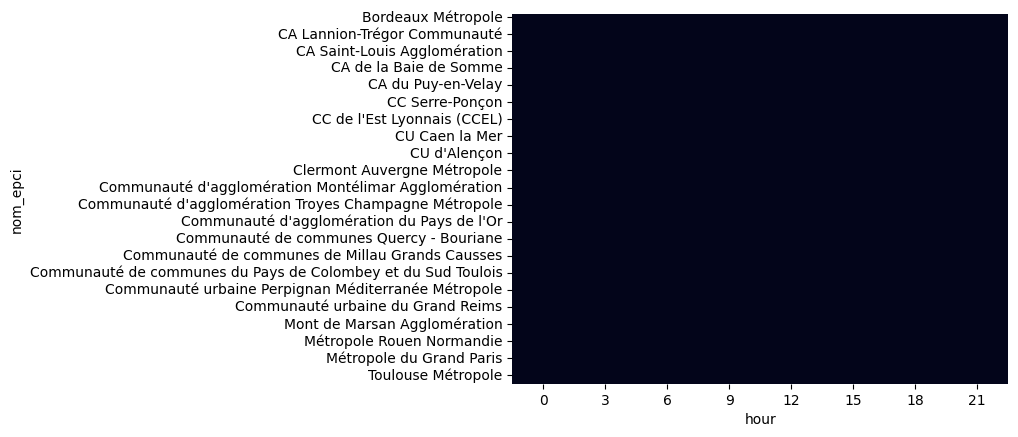

In [36]:

weather['hour'] = weather['date'].dt.hour
missing_heatmap = weather.pivot_table(
    index='nom_epci', columns='hour', values='t', aggfunc='count', fill_value=0
)
sns.heatmap(missing_heatmap == 0, cbar=False)  # 白色表示缺失

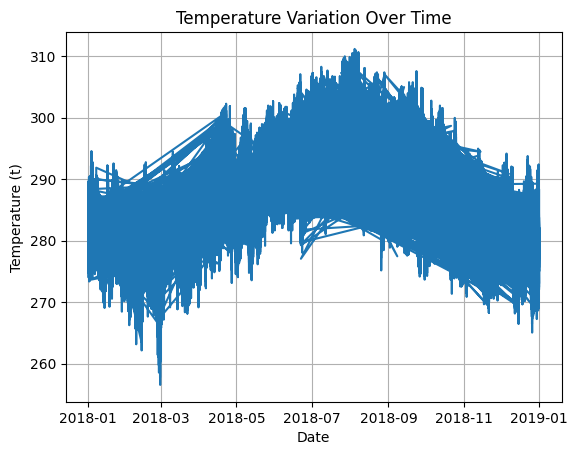

In [15]:
# 只显示 2018 年的数据
weather_2018 = weather[weather['date'].dt.year == 2018]

plt.plot(weather_2018['date'], weather_2018['t'])
plt.xlabel('Date')
plt.ylabel('Temperature (t)')
plt.title('Temperature Variation Over Time')
plt.grid(True)
plt.show()

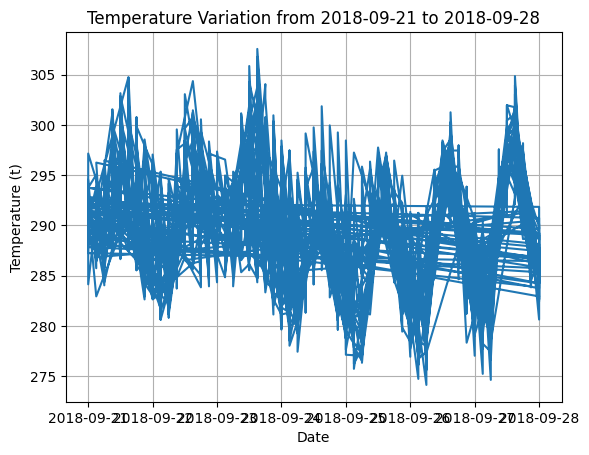

In [16]:
# 生成 2018年 9 月 21日到 28日的温度变化
start_date = '2018-09-21'
end_date = '2018-09-28'
weather_sept = weather_2018[(weather_2018['date'] >= start_date) & (weather_2018['date'] <= end_date)]

plt.plot(weather_sept['date'], weather_sept['t'])
plt.xlabel('Date')
plt.ylabel('Temperature (t)')
plt.title('Temperature Variation from 2018-09-21 to 2018-09-28')
plt.grid(True)
plt.show()

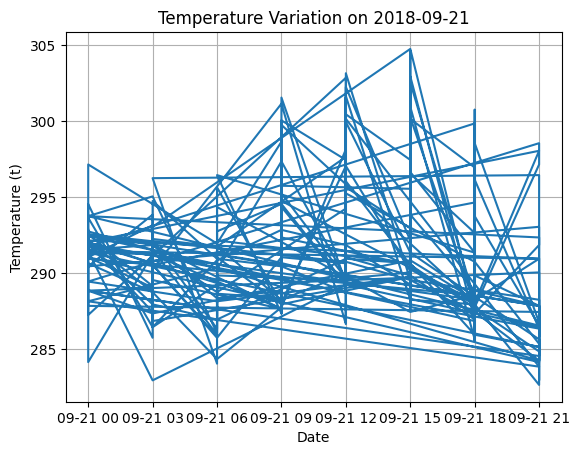

In [17]:
# 生成 2018年 9 月 21日到 28日的温度变化
# 生成 2018年 9 月 21日一天的温度变化
single_day = '2018-09-21'
weather_single_day = weather_2018[weather_2018['date'].dt.date == pd.to_datetime(single_day).date()]

plt.plot(weather_single_day['date'], weather_single_day['t'])
plt.xlabel('Date')
plt.ylabel('Temperature (t)')
plt.title('Temperature Variation on 2018-09-21')
plt.grid(True)
plt.show()

In [18]:
# 添加星期几的信息
public_df['Weekday'] = public_df['date_utc'].dt.weekday

print(public_df[['date_utc', 'Weekday']].head(200))

                     date_utc  Weekday
0   2017-02-13 00:30:00+00:00        0
1   2017-02-13 01:00:00+00:00        0
2   2017-02-13 01:30:00+00:00        0
3   2017-02-13 02:00:00+00:00        0
4   2017-02-13 02:30:00+00:00        0
..                        ...      ...
195 2017-02-17 02:00:00+00:00        4
196 2017-02-17 02:30:00+00:00        4
197 2017-02-17 03:00:00+00:00        4
198 2017-02-17 03:30:00+00:00        4
199 2017-02-17 04:00:00+00:00        4

[200 rows x 2 columns]


In [19]:
# 使用正弦和余弦函数来表示一天中的时间
public_df['sin_time'] = np.sin(2*np.pi*public_df['date_utc'].dt.hour/24)
public_df['cos_time'] = np.cos(2*np.pi*public_df['date_utc'].dt.hour/24)

print(public_df[['date_utc', 'sin_time', 'cos_time']].head(200))

                     date_utc  sin_time  cos_time
0   2017-02-13 00:30:00+00:00  0.000000  1.000000
1   2017-02-13 01:00:00+00:00  0.258819  0.965926
2   2017-02-13 01:30:00+00:00  0.258819  0.965926
3   2017-02-13 02:00:00+00:00  0.500000  0.866025
4   2017-02-13 02:30:00+00:00  0.500000  0.866025
..                        ...       ...       ...
195 2017-02-17 02:00:00+00:00  0.500000  0.866025
196 2017-02-17 02:30:00+00:00  0.500000  0.866025
197 2017-02-17 03:00:00+00:00  0.707107  0.707107
198 2017-02-17 03:30:00+00:00  0.707107  0.707107
199 2017-02-17 04:00:00+00:00  0.866025  0.500000

[200 rows x 3 columns]


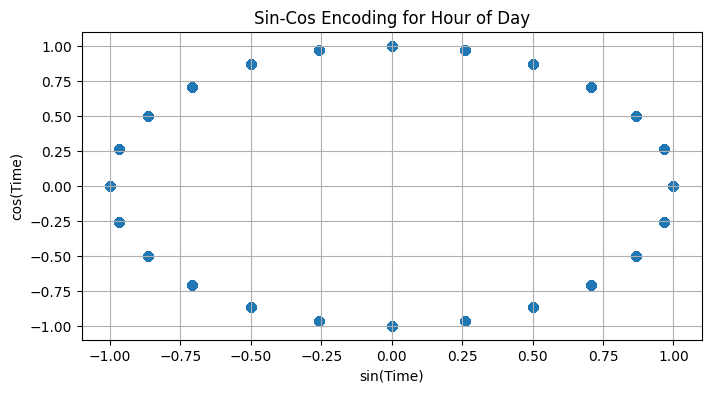

In [20]:
plt.figure(figsize=(8, 4))
plt.scatter(public_df['sin_time'], public_df['cos_time'])
plt.title('Sin-Cos Encoding for Hour of Day')
plt.xlabel('sin(Time)')
plt.ylabel('cos(Time)')
plt.grid()
plt.show()

In [21]:
# 添加正弦和余弦编码
public_df['Weekday_sin'] = np.sin(2 * np.pi * public_df['Weekday'] / 7)
public_df['Weekday_cos'] = np.cos(2 * np.pi * public_df['Weekday'] / 7)

# 查看结果
print(public_df[['Weekday', 'Weekday_sin', 'Weekday_cos']].head(200))

     Weekday  Weekday_sin  Weekday_cos
0          0     0.000000     1.000000
1          0     0.000000     1.000000
2          0     0.000000     1.000000
3          0     0.000000     1.000000
4          0     0.000000     1.000000
..       ...          ...          ...
195        4    -0.433884    -0.900969
196        4    -0.433884    -0.900969
197        4    -0.433884    -0.900969
198        4    -0.433884    -0.900969
199        4    -0.433884    -0.900969

[200 rows x 3 columns]


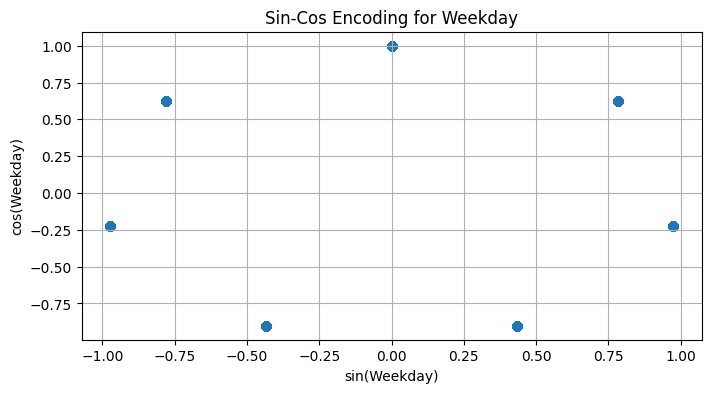

In [22]:
plt.figure(figsize=(8, 4))
plt.scatter(public_df['Weekday_sin'], public_df['Weekday_cos'])
plt.title('Sin-Cos Encoding for Weekday')
plt.xlabel('sin(Weekday)')
plt.ylabel('cos(Weekday)')
plt.grid()
plt.show()


In [23]:
# 标记节假日
fr_holidays = holidays.France()  # 获取法国节假日
public_df['is_holiday'] = public_df['date_utc'].dt.date.apply(lambda x: x in fr_holidays)

# 标记暑假（假设7月1日到8月31日为暑假）
public_df['is_summer_vacation'] = public_df['date_utc'].dt.month.isin([7, 8])

# 标记疫情期间（假设2020年3月至2021年6月为疫情）
public_df['is_pandemic'] = public_df['date_utc'].between('2020-03-01', '2021-06-30')

#print(public_df[['date_utc', 'is_holiday', 'is_summer_vacation', 'is_pandemic']].head(200))
print(public_df[['date_utc', 'is_holiday', 'is_summer_vacation', 'is_pandemic']].iloc[75000::200].head(15))


                       date_utc  is_holiday  is_summer_vacation  is_pandemic
75000 2021-05-25 16:30:00+00:00       False               False         True
75200 2021-05-29 20:30:00+00:00       False               False         True
75400 2021-06-03 00:30:00+00:00       False               False         True
75600 2021-06-07 04:30:00+00:00       False               False         True
75800 2021-06-11 08:30:00+00:00       False               False         True
76000 2021-06-15 12:30:00+00:00       False               False         True
76200 2021-06-19 16:30:00+00:00       False               False         True
76400 2021-06-23 20:30:00+00:00       False               False         True
76600 2021-06-28 00:30:00+00:00       False               False         True
76800 2021-07-02 04:30:00+00:00       False                True        False
77000 2021-07-06 08:30:00+00:00       False                True        False
77200 2021-07-10 12:30:00+00:00       False                True        False

In [24]:
# 提取月份
public_df['Month'] = public_df['date_utc'].dt.month

# 根据月份划分季节
def get_season(month):
    if month in [3, 4, 5]:
        return 0  # 春天
    elif month in [6, 7, 8]:
        return 1  # 夏天
    elif month in [9, 10, 11]:
        return 2  # 秋天
    else:
        return 3  # 冬天

# 应用函数生成 Season 列
public_df['Season'] = public_df['Month'].apply(get_season)

# 查看结果
print(public_df[['date_utc', 'Month', 'Season']].iloc[::3000].head(10))


                       date_utc  Month  Season
0     2017-02-13 00:30:00+00:00      2       3
3000  2017-04-16 12:30:00+00:00      4       0
6000  2017-06-18 00:30:00+00:00      6       1
9000  2017-08-19 12:30:00+00:00      8       1
12000 2017-10-21 00:30:00+00:00     10       2
15000 2017-12-22 13:30:00+00:00     12       3
18000 2018-02-23 01:30:00+00:00      2       3
21000 2018-04-26 13:30:00+00:00      4       0
24000 2018-06-28 01:30:00+00:00      6       1
27000 2018-08-29 13:30:00+00:00      8       1


Pour que le model comprenne mieux les données, on utilise One-hot encodage pour transformer les données multiclasses en plusieurs binaires.

In [25]:
# 进行 One-Hot 编码
season_one_hot = pd.get_dummies(public_df['Season'], prefix='Season')

# 将 One-Hot 编码添加到原始数据框
public_df = pd.concat([public_df, season_one_hot], axis=1)

# 查看结果
print(public_df[['Season', 'Season_0', 'Season_1', 'Season_2', 'Season_3']].iloc[::3000].head(10))


       Season  Season_0  Season_1  Season_2  Season_3
0           3     False     False     False      True
3000        0      True     False     False     False
6000        1     False      True     False     False
9000        1     False      True     False     False
12000       2     False     False      True     False
15000       3     False     False     False      True
18000       3     False     False     False      True
21000       0      True     False     False     False
24000       1     False      True     False     False
27000       1     False      True     False     False


In [26]:
# 对 Weekday 进行 One-Hot 编码
weekday_one_hot = pd.get_dummies(public_df['Weekday'], prefix='Weekday')

# 将 One-Hot 编码后的列添加到原始数据框
public_df = pd.concat([public_df, weekday_one_hot], axis=1)

# 查看结果
print(public_df[['Weekday', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6']].iloc[::3000].head(10))


       Weekday  Weekday_0  Weekday_1  Weekday_2  Weekday_3  Weekday_4  \
0            0       True      False      False      False      False   
3000         6      False      False      False      False      False   
6000         6      False      False      False      False      False   
9000         5      False      False      False      False      False   
12000        5      False      False      False      False      False   
15000        4      False      False      False      False       True   
18000        4      False      False      False      False       True   
21000        3      False      False      False       True      False   
24000        3      False      False      False       True      False   
27000        2      False      False       True      False      False   

       Weekday_5  Weekday_6  
0          False      False  
3000       False       True  
6000       False       True  
9000        True      False  
12000       True      False  
15000      False

In [27]:
public_df['is_weekend'] = public_df['Weekday'].apply(lambda x: x in [5, 6])

# 查看结果
print(public_df[['Weekday', 'is_weekend']].iloc[::100].head(200))

       Weekday  is_weekend
0            0       False
100          2       False
200          4       False
300          6        True
400          1       False
...        ...         ...
19500        0       False
19600        2       False
19700        4       False
19800        6        True
19900        1       False

[200 rows x 2 columns]


In [28]:
# 提取年月日和小时列
public_df['Year'] = public_df['date_utc'].dt.year
public_df['Day'] = public_df['date_utc'].dt.day
public_df['Hour'] = public_df['date_utc'].dt.hour


In [29]:
def fill_with_cyclic_mean(df, col):
    """
    根据其他年份同月同日同时间的数据填充空值
    Args:
        df: 数据集
        col: 需要填充的列名
    """
    for index in df[df[col].isnull()].index:  # 遍历每个空值
        # 获取当前空值的时间特征
        month = df.loc[index, 'Month']
        day = df.loc[index, 'Day']
        hour = df.loc[index, 'Hour']
        
        # 找到其他年份同时间点的数据
        similar_time_data = df[(df['Month'] == month) & 
                               (df['Day'] == day) & 
                               (df['Hour'] == hour) & 
                               (~df[col].isnull())][col]
        
        # 如果有匹配的数据，计算均值填充
        if not similar_time_data.empty:
            df.at[index, col] = similar_time_data.mean()


In [30]:
# 获取 public_df 中的列名
column_names = public_df.columns.tolist()

# 打印列名
print(column_names)

# 查找 'date_utc' 列的索引
date_utc_index = column_names.index('date_utc')

# 获取 'date_utc' 之前的所有解释变量的列名
explanatory_vars = column_names[:date_utc_index]


['date', 'France', 'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France', 'Montpellier Méditerranée Métropole', 'Métropole Européenne de Lille', 'Métropole Grenoble-Alpes-Métropole', "Métropole Nice Côte d'Azur", 'Métropole Rennes Métropole', 'Métropole Rouen Normandie', "Métropole d'Aix-Marseille-Provence", 'Métropole de Lyon', 'Métropole du Grand Nancy', 'Métropole du Grand Paris', 'Nantes Métropole', 'Toulouse Métropole', 'date_utc', 'Weekday', 'sin_time', 'cos_time', 'Weekday_sin', 'Weekday_cos', 'is_holiday', 'is_summer_vacation', 'is_pandemic', 'Month', 'Season', 'Season_0', 'Season_1', 'Season_2', 'Season_3', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6', 'is_weekend', 'Year', 'Day', 'Hour']


In [31]:
# 对解释变量列进行空值填充
for col in explanatory_vars:
    fill_with_cyclic_mean(public_df, col)

# 检查填充后的空值数量
print(public_df[explanatory_vars].isnull().sum())


date                                  0
France                                0
Auvergne-Rhône-Alpes                  0
Bourgogne-Franche-Comté               0
Bretagne                              0
Centre-Val de Loire                   0
Grand Est                             0
Hauts-de-France                       0
Normandie                             0
Nouvelle-Aquitaine                    0
Occitanie                             0
Pays de la Loire                      0
Provence-Alpes-Côte d'Azur            0
Île-de-France                         0
Montpellier Méditerranée Métropole    0
Métropole Européenne de Lille         0
Métropole Grenoble-Alpes-Métropole    0
Métropole Nice Côte d'Azur            0
Métropole Rennes Métropole            0
Métropole Rouen Normandie             0
Métropole d'Aix-Marseille-Provence    0
Métropole de Lyon                     0
Métropole du Grand Nancy              0
Métropole du Grand Paris              0
Nantes Métropole                      0


['date', 'France', 'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne', 'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur", 'Île-de-France', 'Montpellier Méditerranée Métropole', 'Métropole Européenne de Lille', 'Métropole Grenoble-Alpes-Métropole', "Métropole Nice Côte d'Azur", 'Métropole Rennes Métropole', 'Métropole Rouen Normandie', "Métropole d'Aix-Marseille-Provence", 'Métropole de Lyon', 'Métropole du Grand Nancy', 'Métropole du Grand Paris', 'Nantes Métropole', 'Toulouse Métropole', 'date_utc', 'Weekday', 'sin_time', 'cos_time', 'Weekday_sin', 'Weekday_cos', 'is_holiday', 'is_summer_vacation', 'is_pandemic', 'Month', 'Season', 'Season_0', 'Season_1', 'Season_2', 'Season_3', 'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6', 'is_weekend']


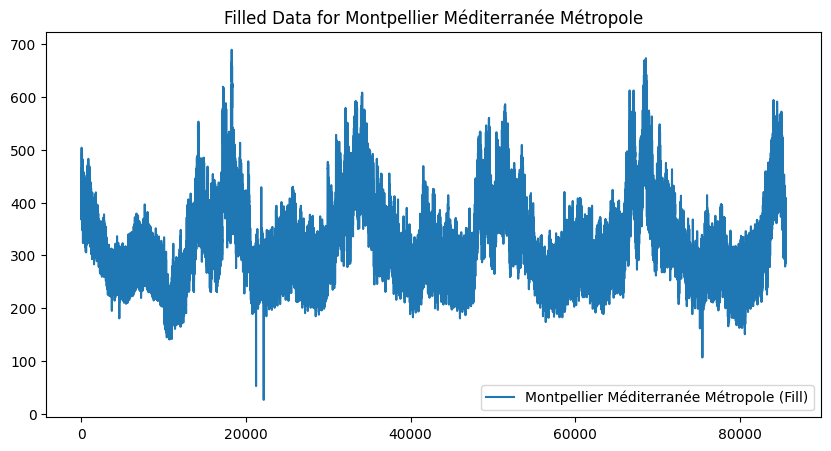

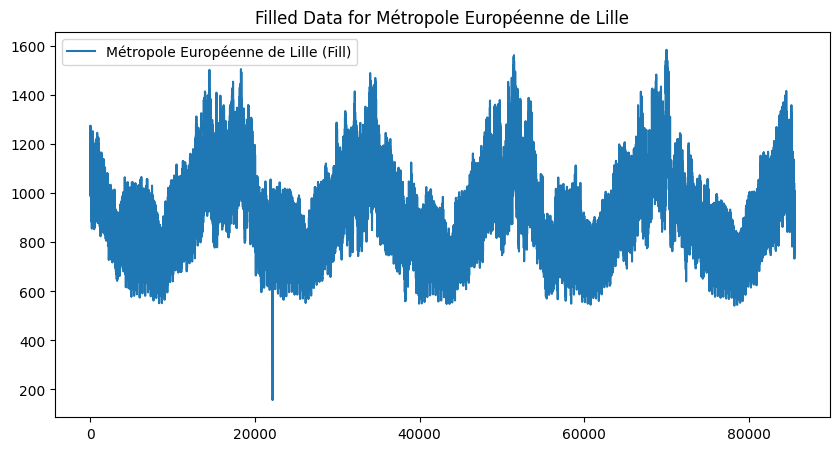

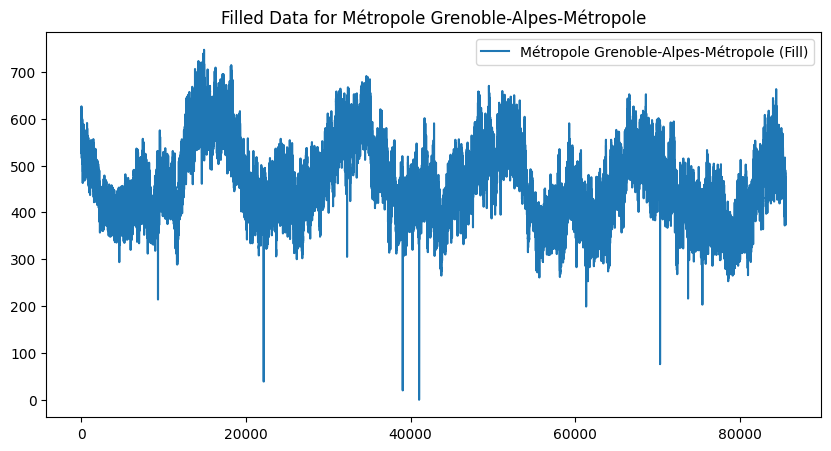

In [32]:


for col in explanatory_vars[14:17]:  # 示例，取前 3 列
    plt.figure(figsize=(10, 5))
    plt.plot(public_df[col], label=f'{col} (Fill)')
    plt.title(f'Filled Data for {col}')
    plt.legend()
    plt.show()

In [33]:
# 查看空值情况
print(public_df[explanatory_vars].isnull().sum())

date                                  0
France                                0
Auvergne-Rhône-Alpes                  0
Bourgogne-Franche-Comté               0
Bretagne                              0
Centre-Val de Loire                   0
Grand Est                             0
Hauts-de-France                       0
Normandie                             0
Nouvelle-Aquitaine                    0
Occitanie                             0
Pays de la Loire                      0
Provence-Alpes-Côte d'Azur            0
Île-de-France                         0
Montpellier Méditerranée Métropole    0
Métropole Européenne de Lille         0
Métropole Grenoble-Alpes-Métropole    0
Métropole Nice Côte d'Azur            0
Métropole Rennes Métropole            0
Métropole Rouen Normandie             0
Métropole d'Aix-Marseille-Provence    0
Métropole de Lyon                     0
Métropole du Grand Nancy              0
Métropole du Grand Paris              0
Nantes Métropole                      0


In [34]:

# 对每一列的空值进行检查和填充
for col in explanatory_vars:
    if public_df[col].isnull().any():
        # 滑动窗口均值填充
        rolling_mean = public_df[col].rolling(window=10, min_periods=1, center=True).mean()
        public_df[col] = public_df[col].fillna(rolling_mean)
        
        # 前向填充（对剩余 NaN）
        public_df[col] = public_df[col].fillna(method='ffill')
        
        # 后向填充（对剩余 NaN）
        public_df[col] = public_df[col].fillna(method='bfill')
        
        # 如果仍有空值，用全局均值填充
        public_df[col] = public_df[col].fillna(public_df[col].mean())

# 查看剩余空值情况
print(public_df[explanatory_vars].isnull().sum())


date                                  0
France                                0
Auvergne-Rhône-Alpes                  0
Bourgogne-Franche-Comté               0
Bretagne                              0
Centre-Val de Loire                   0
Grand Est                             0
Hauts-de-France                       0
Normandie                             0
Nouvelle-Aquitaine                    0
Occitanie                             0
Pays de la Loire                      0
Provence-Alpes-Côte d'Azur            0
Île-de-France                         0
Montpellier Méditerranée Métropole    0
Métropole Européenne de Lille         0
Métropole Grenoble-Alpes-Métropole    0
Métropole Nice Côte d'Azur            0
Métropole Rennes Métropole            0
Métropole Rouen Normandie             0
Métropole d'Aix-Marseille-Provence    0
Métropole de Lyon                     0
Métropole du Grand Nancy              0
Métropole du Grand Paris              0
Nantes Métropole                      0


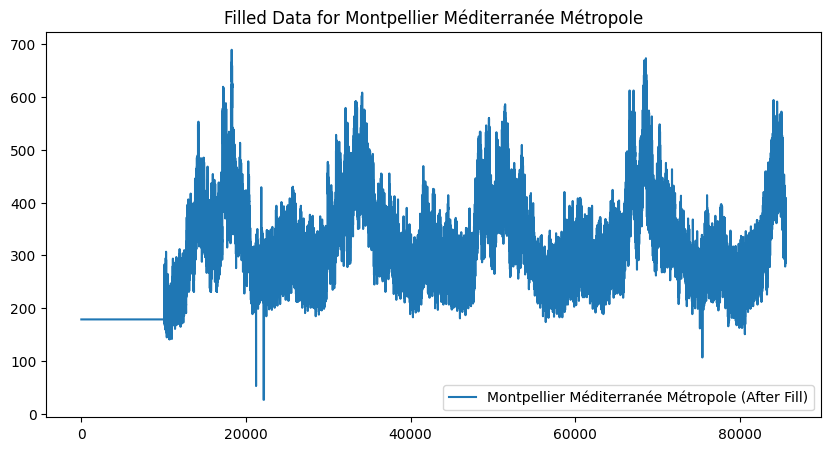

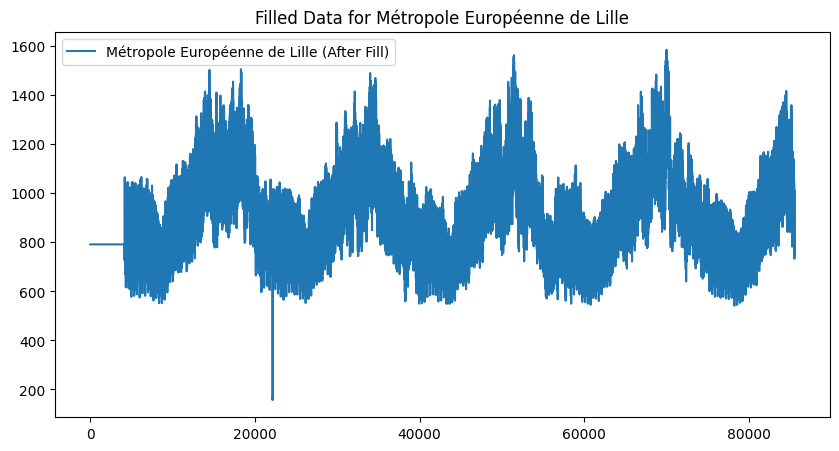

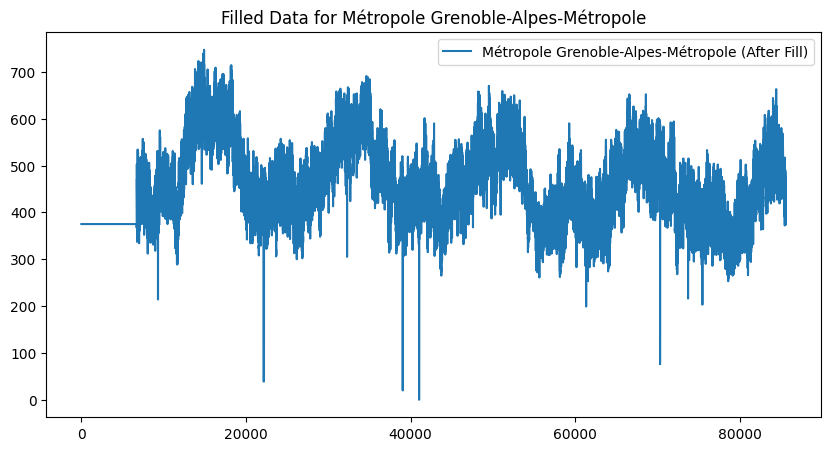

In [24]:
# 绘制填充前后的数据对比
for col in explanatory_vars[14:17]:  # 示例，取前 3 列
    plt.figure(figsize=(10, 5))
    plt.plot(public_df[col], label=f'{col} (After Fill)')
    plt.title(f'Filled Data for {col}')
    plt.legend()
    plt.show()
